In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.ticker import FuncFormatter
from seaborn.algorithms import bootstrap
from seaborn.utils import ci

from tmp.utils import formatter

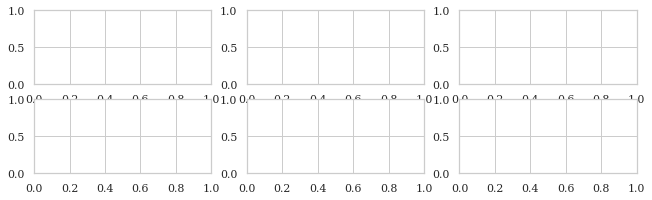

In [7]:
form = FuncFormatter(formatter)

plt.rc('font', family='serif')
plt.rc('text', usetex=False)
sns.set(style="whitegrid", font="serif")
color_mine = ["#F8414A", "#5676A1", "#FD878D", "#385A89",  "#FFFACD", "#EFCC00"]

df = pd.read_csv("../data/users_neighborhood_anon.csv")

f, axzs = plt.subplots(2, 3, figsize=(10.8, 3))
boxprops = dict(linewidth=0.3)
whiskerprops = dict(linewidth=0.3)
capprops = dict(linewidth=0.3)
medianprops = dict(linewidth=1)


In [8]:
auxfs = [["median", "median", "median"],
        ["avg", "avg", "avg"]]

attributes_all = [["betweenness", "eigenvector", "out_degree"],
                  ["betweenness", "eigenvector", "out_degree"]]
titles_all = [["median(betweenness)", "median(eigenvector)", "median(out degree)"],
              ["avg(betweenness)", "avg(eigenvector)", "avg(out degree)"]]

rects = None
first = True
for axs, attributes, titles, auxf in zip(axzs, attributes_all, titles_all, auxfs):

    for axis, attribute, title, aux in zip(axs, attributes, titles, auxf):
        N = 4
        men = [df[df.hate == "hateful"],
               df[df.hate == "normal"],
               df[df.hate_neigh],
               df[df.normal_neigh],
               df[df.is_63_2 == True],
               df[df.is_63_2 == False]]
        tmp = []
        medians, medians_ci = [], []
        averages, averages_ci = [], []

        for category in men:
            boots = bootstrap(category[attribute], func=np.nanmean, n_boot=1000)
            ci_tmp = ci(boots)
            average = (ci_tmp[0] + ci_tmp[1]) / 2
            ci_average = (ci_tmp[1] - ci_tmp[0]) / 2
            averages.append(average)
            averages_ci.append(ci_average)
            boots = bootstrap(category[attribute], func=np.nanmedian, n_boot=1000)
            ci_tmp = ci(boots)
            median = (ci_tmp[0] + ci_tmp[1]) / 2
            ci_median = (ci_tmp[1] - ci_tmp[0]) / 2
            medians.append(median)
            medians_ci.append(ci_median)

            tmp.append(category[attribute].values)

        ind = np.array([0, 1, 2, 3, 4, 5])
        width = .6
        if aux == "median":
            rects = axis.bar(ind, medians, width, yerr=medians_ci, color=color_mine,
                             ecolor="#212823", edgecolor=["#4D1A17"]*6, linewidth=.3)
        if aux == "avg":
            rects = axis.bar(ind, averages, width, yerr=averages_ci, color=color_mine,
                             ecolor="#212823", edgecolor=["#4D1A17"]*6, linewidth=.3)

        axis.yaxis.set_major_formatter(form)

        axis.set_xticks([])
        axis.set_title(title)
        axis.set_ylabel("")
        axis.set_xlabel("")
        axis.axvline(1.5, ls='dashed', linewidth=0.3, color="#C0C0C0")
        axis.axvline(4.5, ls='dashed', linewidth=0.3, color="#C0C0C0")

    first = False


In [9]:
f.legend((rects[0], rects[1], rects[2], rects[3], rects[4], rects[5]),
         ('Hateful User', 'Normal User', 'Hateful Neigh.', 'Normal Neigh.', 'Suspended', 'Active'),
         loc='upper center',
         fancybox=True, shadow=True, ncol=6)
f.tight_layout(rect=[0, 0, 1, 1])

In [10]:
f.savefig("results/betweenness.pdf")